In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Optional: make seaborn prettier
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv('/workspaces/ds-fall-2025-tue/Week-03-EDA-and-Dashboards/data/movie_ratings.csv')

# Basic info
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212595 entries, 0 to 212594
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      212595 non-null  int64  
 1   movie_id     212595 non-null  int64  
 2   rating       212595 non-null  int64  
 3   timestamp    212595 non-null  object 
 4   age          212595 non-null  int64  
 5   gender       212595 non-null  object 
 6   occupation   212595 non-null  object 
 7   zip_code     212595 non-null  object 
 8   title        212595 non-null  object 
 9   year         212559 non-null  float64
 10  decade       212559 non-null  float64
 11  genres       212595 non-null  object 
 12  rating_year  212595 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 21.1+ MB


,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime,1998
2,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Film-Noir,1998
3,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Mystery,1998
4,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Thriller,1998


/tmp/ipykernel_10606/3430682315.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


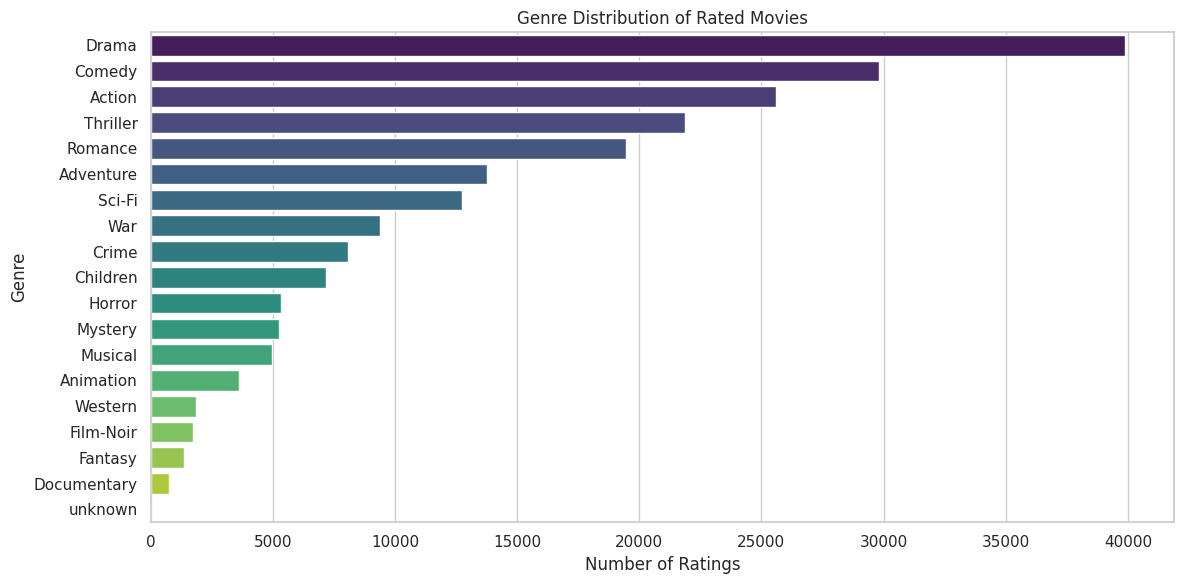

In [2]:
# Explode the genres column
df_genres = df.copy()
# "Action|Adventure|Sci-Fi" is a sype of value in genre column. "Action|Adventure|Sci-Fi" → ['Action', 'Adventure', 'Sci-Fi']
df_genres['genres'] = df_genres['genres'].str.split('|') 
# .explode() takes a column where each cell contains a list (like ['Action', 'Adventure', 'Sci-Fi']) and Creates a new row for each element in the list.
df_genres = df_genres.explode('genres')

# Count genres
genre_counts = df_genres['genres'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6)) # Width, height in inches.
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title('Genre Distribution of Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Genre')
plt.tight_layout()


/tmp/ipykernel_10606/649281951.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean_rating', y='genres', data=filtered.sort_values('mean_rating', ascending=False), palette='coolwarm')


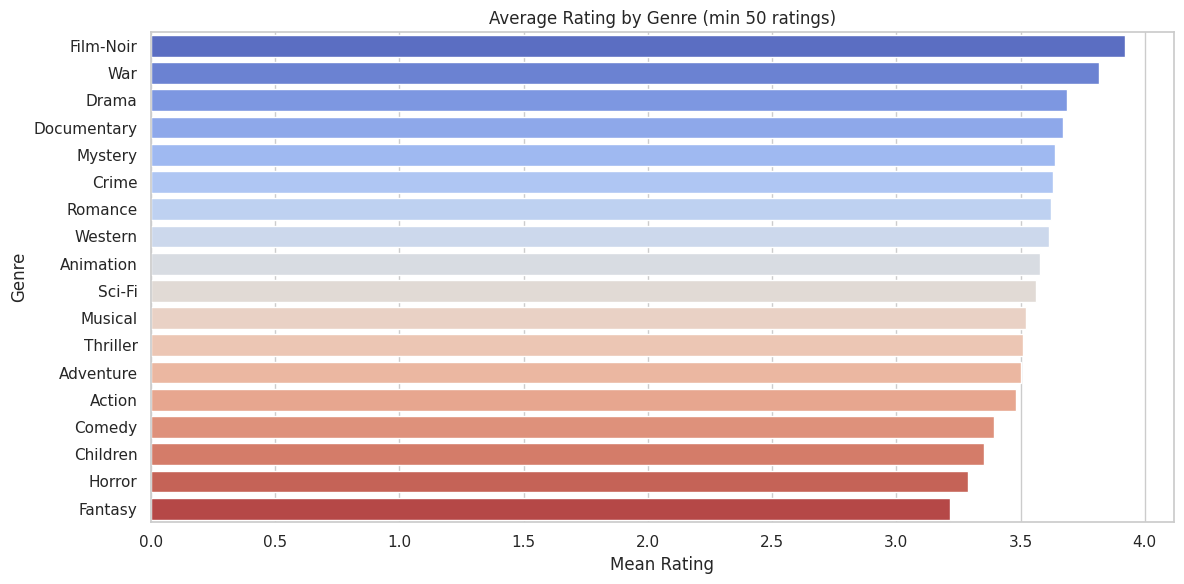

In [3]:
# Group by genre and calculate mean rating and count
genre_stats = df_genres.groupby('genres').agg(
    mean_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

# Filter out genres with fewer than 50 ratings
filtered = genre_stats[genre_stats['rating_count'] >= 50]

# Sort and plot
plt.figure(figsize=(12, 6))
sns.barplot(x='mean_rating', y='genres', data=filtered.sort_values('mean_rating', ascending=False), palette='coolwarm')
plt.title('Average Rating by Genre (min 50 ratings)')
plt.xlabel('Mean Rating')
plt.ylabel('Genre')
plt.tight_layout()


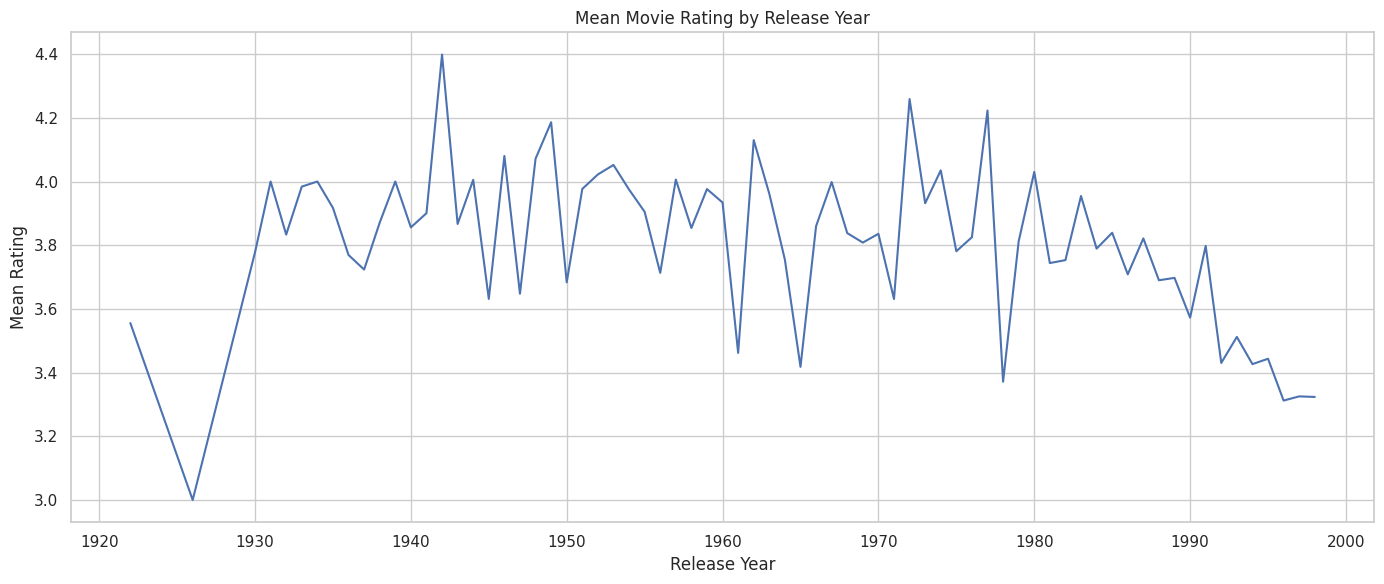

In [4]:
# Group by year
yearly_rating = df.groupby('year').agg(
    mean_rating=('rating', 'mean'),
    count=('rating', 'count')
).reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_rating, x='year', y='mean_rating')
plt.title('Mean Movie Rating by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Mean Rating')
plt.tight_layout()


In [5]:
movie_stats = df.groupby('title').agg(
    mean_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

# Top 5 with at least 50 ratings
top_50 = movie_stats[movie_stats['rating_count'] >= 50].sort_values('mean_rating', ascending=False).head(5)

# Top 5 with at least 150 ratings
top_150 = movie_stats[movie_stats['rating_count'] >= 150].sort_values('mean_rating', ascending=False).head(5)

# Display
print("Top 5 Movies (min 50 ratings):")
print(top_50)

print("\nTop 5 Movies (min 150 ratings):")
print(top_150)


Top 5 Movies (min 50 ratings):
                                                  title  mean_rating  \
318                               Close Shave, A (1995)     4.491071   
1281                            Schindler's List (1993)     4.466443   
1652                         Wrong Trousers, The (1993)     4.466102   
273                                   Casablanca (1942)     4.456790   
1597  Wallace & Gromit: The Best of Aardman Animatio...     4.447761   

      rating_count  
318            336  
1281           596  
1652           236  
273            729  
1597            67  

Top 5 Movies (min 150 ratings):
                                 title  mean_rating  rating_count
318              Close Shave, A (1995)     4.491071           336
1281           Schindler's List (1993)     4.466443           596
1652        Wrong Trousers, The (1993)     4.466102           236
273                  Casablanca (1942)     4.456790           729
1317  Shawshank Redemption, The (1994)     4.44

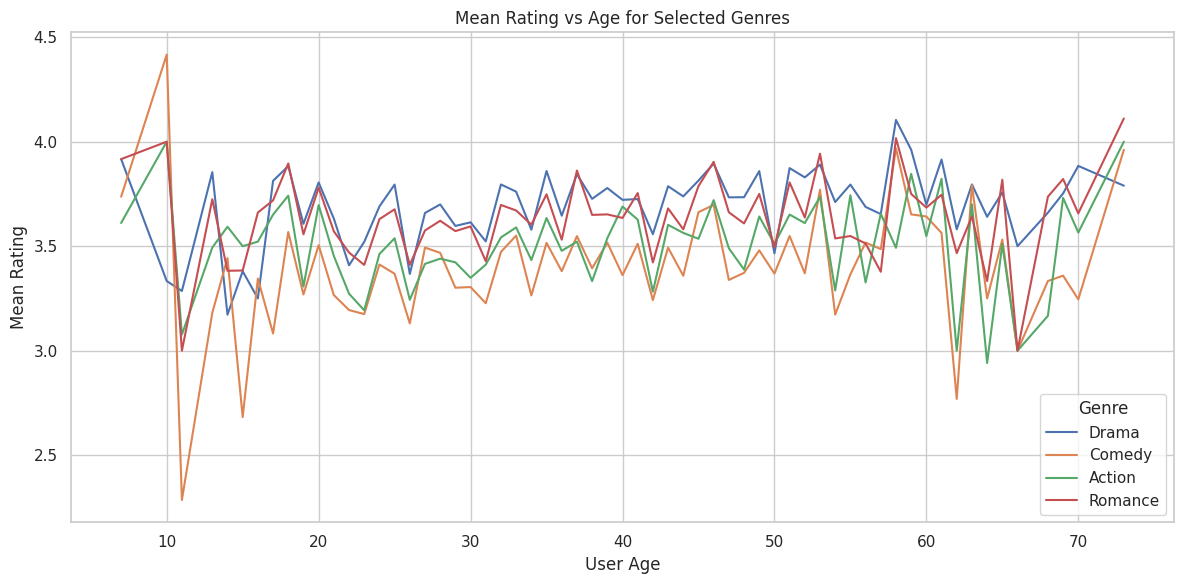

In [6]:
# Use exploded df
age_genre = df_genres.groupby(['genres', 'age']).agg(mean_rating=('rating', 'mean')).reset_index()

# Pick 4-6 popular genres
selected_genres = ['Drama', 'Comedy', 'Action', 'Romance']
plt.figure(figsize=(12, 6))
for genre in selected_genres:
    subset = age_genre[age_genre['genres'] == genre]
    sns.lineplot(data=subset, x='age', y='mean_rating', label=genre)

plt.title('Mean Rating vs Age for Selected Genres')
plt.xlabel('User Age')
plt.ylabel('Mean Rating')
plt.legend(title='Genre')
plt.tight_layout()
